In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.model_selection import train_test_split 
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/derickrentz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/derickrentz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Load dataset
def load_data():
    data = pd.read_csv('twitter_dataset.csv')
    return data

In [3]:
tweet_df = load_data()
tweet_df.head()

,Index,Tweet,Suicidal_Ideation
0,1,@pvillegas_tlSUR I express my sadness for Sebastian and other friends who were killed.\n\nI am v...,N
1,2,Please feel free to add me on Genshin friends! I am UID 621509483 . I suck at the game but I'd l...,N
2,3,"@klasic3 @247Fame @amadeusrock @CP24 No, THIS shows that the government knows how bad Ford screw...",N
3,4,"@CollinwoodOf I am just getting to the part where they hang Victoria Winters,,,,sad,,hope she ma...",N
4,5,"Open SmartNews and read ""After coming out, a soldier was allegedly raped by another military mem...",N


In [4]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (500, 3)
Columns are: Index(['Index', 'Tweet', 'Suicidal_Ideation'], dtype='object')


<AxesSubplot:xlabel='Suicidal_Ideation', ylabel='count'>

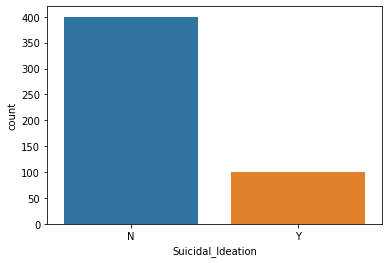

In [5]:
sns.countplot(x = 'Suicidal_Ideation', data = tweet_df)

In [6]:
df = pd.DataFrame(tweet_df[['Index', 'Tweet']])
df

,Index,Tweet
0,1,@pvillegas_tlSUR I express my sadness for Sebastian and other friends who were killed.\n\nI am v...
1,2,Please feel free to add me on Genshin friends! I am UID 621509483 . I suck at the game but I'd l...
2,3,"@klasic3 @247Fame @amadeusrock @CP24 No, THIS shows that the government knows how bad Ford screw..."
3,4,"@CollinwoodOf I am just getting to the part where they hang Victoria Winters,,,,sad,,hope she ma..."
4,5,"Open SmartNews and read ""After coming out, a soldier was allegedly raped by another military mem..."
...,...,...
495,496,I'm in love with a suicide\nIn too deep is just a state of mind\nSelf-sedation is my fucking 9 t...
496,497,@LastWeekTonight HAMAS TERRORIST’s WAR CRIMES LIST THAT YOU FAILED TO mention &amp; CONDEMN\n-Sh...
497,498,People are really really desperate to bully 14 year olds into committing suicide given how much ...
498,499,I love how unassuming these game icons are. You'd never guess one of them is one of the worst ga...


(-0.5, 399.5, 199.5, -0.5)

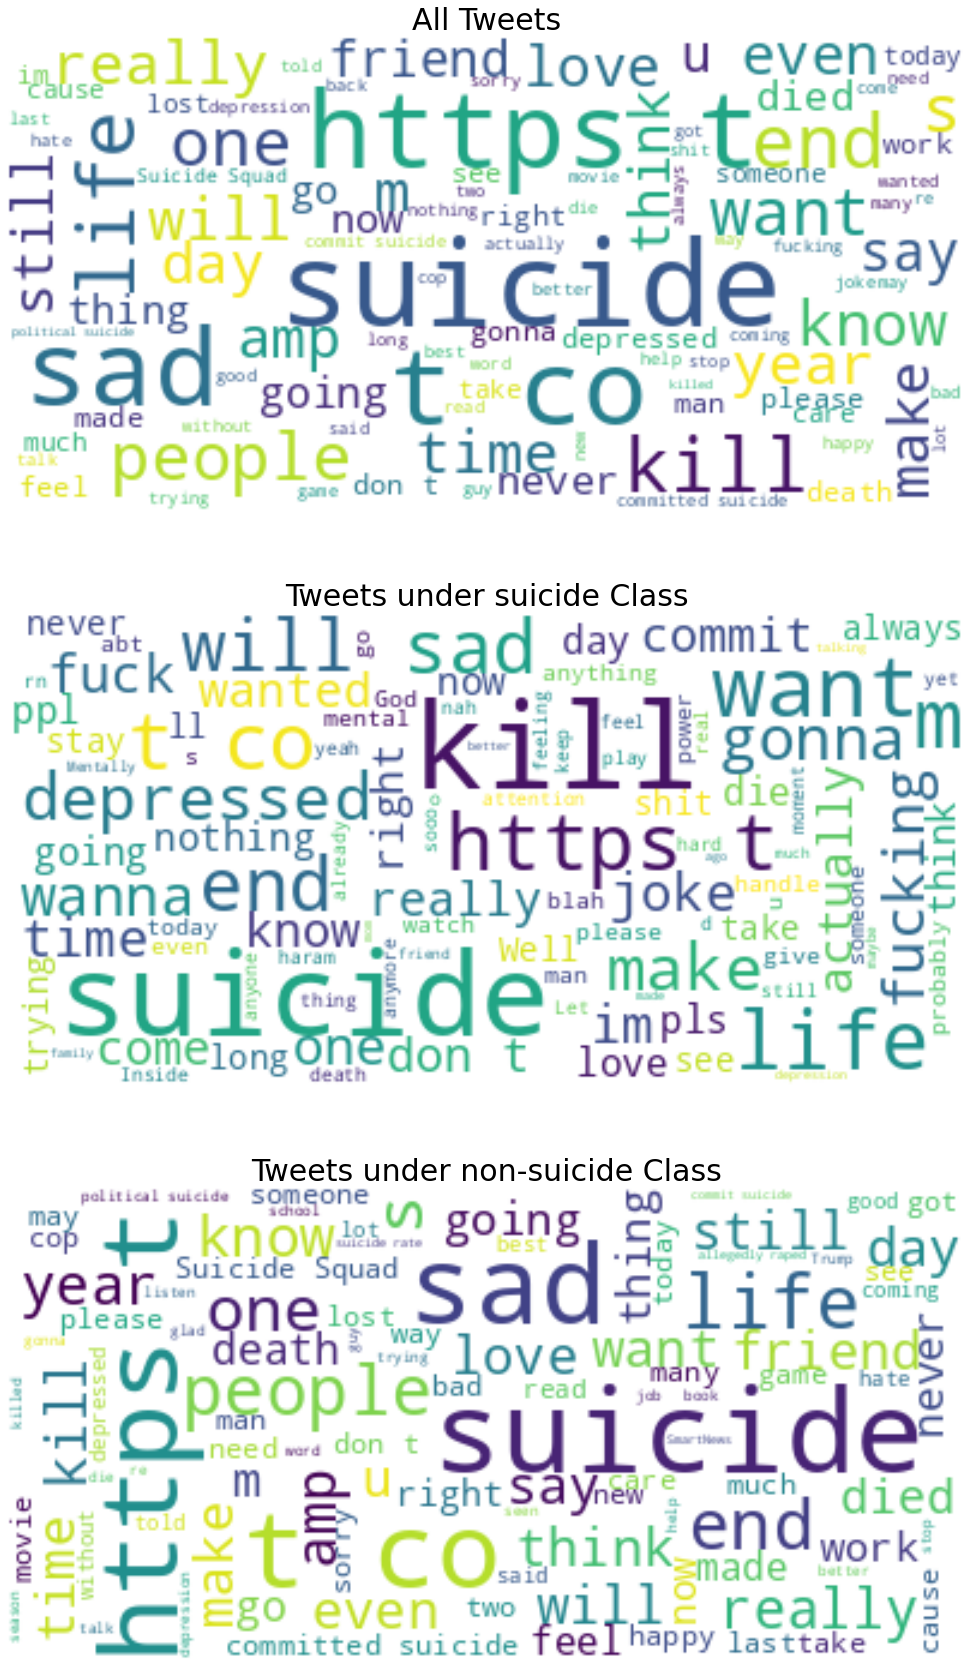

In [7]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_suicide = tweet_df[tweet_df['Suicidal_Ideation']=='Y']
df_not_suicide = tweet_df[tweet_df['Suicidal_Ideation']=='N']
tweet_All = " ".join(review for review in df.Tweet)
tweet_suicide = " ".join(review for review in df_suicide.Tweet)
tweet_not_suicide = " ".join(review for review in df_not_suicide.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_suicide = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_suicide)
wordcloud_not_suicide = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_not_suicide)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_suicide, interpolation='bilinear')
ax[1].set_title('Tweets under suicide Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_not_suicide, interpolation='bilinear')
ax[2].set_title('Tweets under non-suicide Class',fontsize=30)
ax[2].axis('off')

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['Tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,Index,Tweet,Tweet_punct
0,1,@pvillegas_tlSUR I express my sadness for Sebastian and other friends who were killed.\n\nI am v...,pvillegastlSUR I express my sadness for Sebastian and other friends who were killed\n\nI am very...
1,2,Please feel free to add me on Genshin friends! I am UID 621509483 . I suck at the game but I'd l...,Please feel free to add me on Genshin friends I am UID I suck at the game but Id love to play ...
2,3,"@klasic3 @247Fame @amadeusrock @CP24 No, THIS shows that the government knows how bad Ford screw...",klasic Fame amadeusrock CP No THIS shows that the government knows how bad Ford screwed up when ...
3,4,"@CollinwoodOf I am just getting to the part where they hang Victoria Winters,,,,sad,,hope she ma...",CollinwoodOf I am just getting to the part where they hang Victoria Winterssadhope she make it t...
4,5,"Open SmartNews and read ""After coming out, a soldier was allegedly raped by another military mem...",Open SmartNews and read After coming out a soldier was allegedly raped by another military membe...
5,6,i am ✨depressed ✨,i am ✨depressed ✨
6,7,📌 THE LAST WORD\n\nANDREW MWENDA: Kadaga made the biggest blunder that may signal the end of her...,📌 THE LAST WORD\n\nANDREW MWENDA Kadaga made the biggest blunder that may signal the end of her ...
7,8,why am i always so depressed,why am i always so depressed
8,9,threatening suicide on Snapchat for attention!!,threatening suicide on Snapchat for attention
9,10,@BareReality That's exactly what HMRC done and are continuing to do so with victims of the loan ...,BareReality Thats exactly what HMRC done and are continuing to do so with victims of the loan ch...


In [10]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,Index,Tweet,Tweet_punct,Tweet_tokenized
0,1,@pvillegas_tlSUR I express my sadness for Sebastian and other friends who were killed.\n\nI am v...,pvillegastlSUR I express my sadness for Sebastian and other friends who were killed\n\nI am very...,"[pvillegastlsur, i, express, my, sadness, for, sebastian, and, other, friends, who, were, killed..."
1,2,Please feel free to add me on Genshin friends! I am UID 621509483 . I suck at the game but I'd l...,Please feel free to add me on Genshin friends I am UID I suck at the game but Id love to play ...,"[please, feel, free, to, add, me, on, genshin, friends, i, am, uid, i, suck, at, the, game, but,..."
2,3,"@klasic3 @247Fame @amadeusrock @CP24 No, THIS shows that the government knows how bad Ford screw...",klasic Fame amadeusrock CP No THIS shows that the government knows how bad Ford screwed up when ...,"[klasic, fame, amadeusrock, cp, no, this, shows, that, the, government, knows, how, bad, ford, s..."
3,4,"@CollinwoodOf I am just getting to the part where they hang Victoria Winters,,,,sad,,hope she ma...",CollinwoodOf I am just getting to the part where they hang Victoria Winterssadhope she make it t...,"[collinwoodof, i, am, just, getting, to, the, part, where, they, hang, victoria, winterssadhope,..."
4,5,"Open SmartNews and read ""After coming out, a soldier was allegedly raped by another military mem...",Open SmartNews and read After coming out a soldier was allegedly raped by another military membe...,"[open, smartnews, and, read, after, coming, out, a, soldier, was, allegedly, raped, by, another,..."


In [11]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['http', 'https'])
#stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
#               'treatment', 'associated', 'patients', 'may','day', 'case','old'])

In [12]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,Index,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,1,@pvillegas_tlSUR I express my sadness for Sebastian and other friends who were killed.\n\nI am v...,pvillegastlSUR I express my sadness for Sebastian and other friends who were killed\n\nI am very...,"[pvillegastlsur, i, express, my, sadness, for, sebastian, and, other, friends, who, were, killed...","[pvillegastlsur, express, sadness, sebastian, friends, killed, sad, devotion, memory]"
1,2,Please feel free to add me on Genshin friends! I am UID 621509483 . I suck at the game but I'd l...,Please feel free to add me on Genshin friends I am UID I suck at the game but Id love to play ...,"[please, feel, free, to, add, me, on, genshin, friends, i, am, uid, i, suck, at, the, game, but,...","[please, feel, free, add, genshin, friends, uid, suck, game, id, love, play, guys, sometime, don..."
2,3,"@klasic3 @247Fame @amadeusrock @CP24 No, THIS shows that the government knows how bad Ford screw...",klasic Fame amadeusrock CP No THIS shows that the government knows how bad Ford screwed up when ...,"[klasic, fame, amadeusrock, cp, no, this, shows, that, the, government, knows, how, bad, ford, s...","[klasic, fame, amadeusrock, cp, shows, government, knows, bad, ford, screwed, warned, even, gets..."
3,4,"@CollinwoodOf I am just getting to the part where they hang Victoria Winters,,,,sad,,hope she ma...",CollinwoodOf I am just getting to the part where they hang Victoria Winterssadhope she make it t...,"[collinwoodof, i, am, just, getting, to, the, part, where, they, hang, victoria, winterssadhope,...","[collinwoodof, getting, part, hang, victoria, winterssadhope, make]"
4,5,"Open SmartNews and read ""After coming out, a soldier was allegedly raped by another military mem...",Open SmartNews and read After coming out a soldier was allegedly raped by another military membe...,"[open, smartnews, and, read, after, coming, out, a, soldier, was, allegedly, raped, by, another,...","[open, smartnews, read, coming, soldier, allegedly, raped, another, military, member, died, suic..."
5,6,i am ✨depressed ✨,i am ✨depressed ✨,"[i, am, depressed, ]","[depressed, ]"
6,7,📌 THE LAST WORD\n\nANDREW MWENDA: Kadaga made the biggest blunder that may signal the end of her...,📌 THE LAST WORD\n\nANDREW MWENDA Kadaga made the biggest blunder that may signal the end of her ...,"[, the, last, word, andrew, mwenda, kadaga, made, the, biggest, blunder, that, may, signal, the,...","[, last, word, andrew, mwenda, kadaga, made, biggest, blunder, may, signal, end, long, political..."
7,8,why am i always so depressed,why am i always so depressed,"[why, am, i, always, so, depressed]","[always, depressed]"
8,9,threatening suicide on Snapchat for attention!!,threatening suicide on Snapchat for attention,"[threatening, suicide, on, snapchat, for, attention]","[threatening, suicide, snapchat, attention]"
9,10,@BareReality That's exactly what HMRC done and are continuing to do so with victims of the loan ...,BareReality Thats exactly what HMRC done and are continuing to do so with victims of the loan ch...,"[barereality, thats, exactly, what, hmrc, done, and, are, continuing, to, do, so, with, victims,...","[barereality, thats, exactly, hmrc, done, continuing, victims, loan, charge, leading, suicides, ..."


In [13]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,Index,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,1,@pvillegas_tlSUR I express my sadness for Sebastian and other friends who were killed.\n\nI am v...,pvillegastlSUR I express my sadness for Sebastian and other friends who were killed\n\nI am very...,"[pvillegastlsur, i, express, my, sadness, for, sebastian, and, other, friends, who, were, killed...","[pvillegastlsur, express, sadness, sebastian, friends, killed, sad, devotion, memory]","[pvillegastlsur, express, sad, sebastian, friend, kill, sad, devot, memori]"
1,2,Please feel free to add me on Genshin friends! I am UID 621509483 . I suck at the game but I'd l...,Please feel free to add me on Genshin friends I am UID I suck at the game but Id love to play ...,"[please, feel, free, to, add, me, on, genshin, friends, i, am, uid, i, suck, at, the, game, but,...","[please, feel, free, add, genshin, friends, uid, suck, game, id, love, play, guys, sometime, don...","[pleas, feel, free, add, genshin, friend, uid, suck, game, id, love, play, guy, sometim, dont, s..."
2,3,"@klasic3 @247Fame @amadeusrock @CP24 No, THIS shows that the government knows how bad Ford screw...",klasic Fame amadeusrock CP No THIS shows that the government knows how bad Ford screwed up when ...,"[klasic, fame, amadeusrock, cp, no, this, shows, that, the, government, knows, how, bad, ford, s...","[klasic, fame, amadeusrock, cp, shows, government, knows, bad, ford, screwed, warned, even, gets...","[klasic, fame, amadeusrock, cp, show, govern, know, bad, ford, screw, warn, even, get, could, ha..."
3,4,"@CollinwoodOf I am just getting to the part where they hang Victoria Winters,,,,sad,,hope she ma...",CollinwoodOf I am just getting to the part where they hang Victoria Winterssadhope she make it t...,"[collinwoodof, i, am, just, getting, to, the, part, where, they, hang, victoria, winterssadhope,...","[collinwoodof, getting, part, hang, victoria, winterssadhope, make]","[collinwoodof, get, part, hang, victoria, winterssadhop, make]"
4,5,"Open SmartNews and read ""After coming out, a soldier was allegedly raped by another military mem...",Open SmartNews and read After coming out a soldier was allegedly raped by another military membe...,"[open, smartnews, and, read, after, coming, out, a, soldier, was, allegedly, raped, by, another,...","[open, smartnews, read, coming, soldier, allegedly, raped, another, military, member, died, suic...","[open, smartnew, read, come, soldier, allegedli, rape, anoth, militari, member, die, suicid, fam..."


In [14]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,Index,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,1,@pvillegas_tlSUR I express my sadness for Sebastian and other friends who were killed.\n\nI am v...,pvillegastlSUR I express my sadness for Sebastian and other friends who were killed\n\nI am very...,"[pvillegastlsur, i, express, my, sadness, for, sebastian, and, other, friends, who, were, killed...","[pvillegastlsur, express, sadness, sebastian, friends, killed, sad, devotion, memory]","[pvillegastlsur, express, sad, sebastian, friend, kill, sad, devot, memori]","[pvillegastlsur, express, sadness, sebastian, friend, killed, sad, devotion, memory]"
1,2,Please feel free to add me on Genshin friends! I am UID 621509483 . I suck at the game but I'd l...,Please feel free to add me on Genshin friends I am UID I suck at the game but Id love to play ...,"[please, feel, free, to, add, me, on, genshin, friends, i, am, uid, i, suck, at, the, game, but,...","[please, feel, free, add, genshin, friends, uid, suck, game, id, love, play, guys, sometime, don...","[pleas, feel, free, add, genshin, friend, uid, suck, game, id, love, play, guy, sometim, dont, s...","[please, feel, free, add, genshin, friend, uid, suck, game, id, love, play, guy, sometime, dont,..."
2,3,"@klasic3 @247Fame @amadeusrock @CP24 No, THIS shows that the government knows how bad Ford screw...",klasic Fame amadeusrock CP No THIS shows that the government knows how bad Ford screwed up when ...,"[klasic, fame, amadeusrock, cp, no, this, shows, that, the, government, knows, how, bad, ford, s...","[klasic, fame, amadeusrock, cp, shows, government, knows, bad, ford, screwed, warned, even, gets...","[klasic, fame, amadeusrock, cp, show, govern, know, bad, ford, screw, warn, even, get, could, ha...","[klasic, fame, amadeusrock, cp, show, government, know, bad, ford, screwed, warned, even, get, c..."
3,4,"@CollinwoodOf I am just getting to the part where they hang Victoria Winters,,,,sad,,hope she ma...",CollinwoodOf I am just getting to the part where they hang Victoria Winterssadhope she make it t...,"[collinwoodof, i, am, just, getting, to, the, part, where, they, hang, victoria, winterssadhope,...","[collinwoodof, getting, part, hang, victoria, winterssadhope, make]","[collinwoodof, get, part, hang, victoria, winterssadhop, make]","[collinwoodof, getting, part, hang, victoria, winterssadhope, make]"
4,5,"Open SmartNews and read ""After coming out, a soldier was allegedly raped by another military mem...",Open SmartNews and read After coming out a soldier was allegedly raped by another military membe...,"[open, smartnews, and, read, after, coming, out, a, soldier, was, allegedly, raped, by, another,...","[open, smartnews, read, coming, soldier, allegedly, raped, another, military, member, died, suic...","[open, smartnew, read, come, soldier, allegedli, rape, anoth, militari, member, die, suicid, fam...","[open, smartnews, read, coming, soldier, allegedly, raped, another, military, member, died, suic..."


In [15]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [16]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['Tweet'])

tfidfconverter = TfidfVectorizer(analyzer=clean_text, max_features=120, min_df=5, max_df=0.7)  
X = tfidfconverter.fit_transform(df['Tweet'])
print('{} Number of tweets has {} words'.format(X.shape[0], X.shape[1]))


500 Number of tweets has 120 words


In [17]:
count_vect_df = pd.DataFrame(X.toarray(), columns=tfidfconverter.get_feature_names())
count_vect_df.head()

,,actual,allegedli,also,alway,amp,anoth,ask,attempt,back,...,us,use,wanna,want,way,without,word,work,would,year
0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.206663,0.0,0.000000,0.0,0.0,0.26555,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.285039,0.0,0.0,0.00000,0.270773,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y = pd.DataFrame(tweet_df['Suicidal_Ideation'])
y = y.values.ravel()
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# y

In [19]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
# y_train

RandomForestClassifier(random_state=0)

In [20]:
predictions = text_classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[74  3]
 [18  5]]
              precision    recall  f1-score   support

           N       0.80      0.96      0.88        77
           Y       0.62      0.22      0.32        23

    accuracy                           0.79       100
   macro avg       0.71      0.59      0.60       100
weighted avg       0.76      0.79      0.75       100

0.79
